# Derivatives Analytics with Python

**_Chapters 9-10_**

**Wiley Finance (2015)**

<img src="http://hilpisch.com/images/derivatives_analytics_front.jpg" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

In [87]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

## Chapter 9: General Market Model

### Zero-Coupon Bond Valuation

In [88]:
%run 09_gmm/CIR_zcb_valuation.py

ZCB Value       0.9608


### European Option Valuation

In [89]:
%run 09_gmm/BCC_option_valuation.py

M76 Value       7.7611
H93 Value       6.8672
BCC97 Value     8.2942


## Monte Carlo Simulation

### CIR Model

In [90]:
%run 10_mcs/CIR_zcb_valuation_gen.py

ZCB Value       0.8373


In [91]:
%run 10_mcs/CIR_zcb_simulation.py

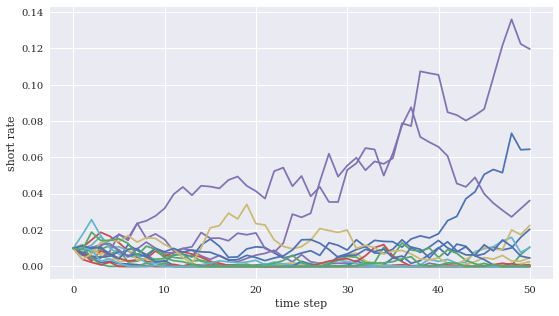

In [92]:
%matplotlib inline
plot_paths()
plt.savefig('../images/10_mcs/CIR_paths.pdf')

In [93]:
zcb_estimator(50).round(4)

array([0.9771, 0.9775, 0.9779, 0.9783, 0.9787, 0.9791, 0.9795, 0.9799,
       0.9803, 0.9807, 0.9811, 0.9815, 0.9819, 0.9823, 0.9827, 0.9832,
       0.9836, 0.984 , 0.9845, 0.9849, 0.9853, 0.9858, 0.9862, 0.9867,
       0.9871, 0.9876, 0.988 , 0.9885, 0.9889, 0.9894, 0.9899, 0.9904,
       0.9908, 0.9913, 0.9918, 0.9923, 0.9928, 0.9933, 0.9938, 0.9943,
       0.9948, 0.9953, 0.9958, 0.9963, 0.9968, 0.9973, 0.9979, 0.9984,
       0.9989, 0.9995, 1.    ])

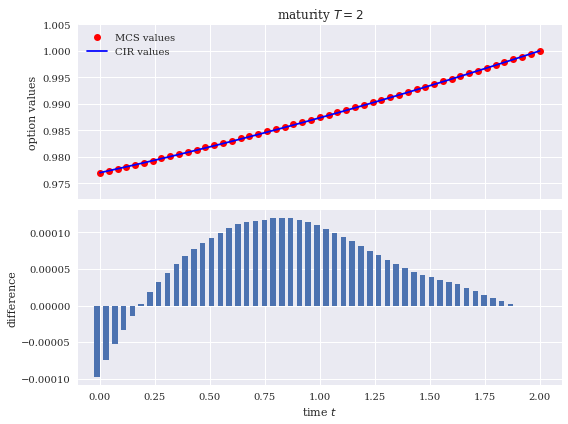

In [94]:
graphical_comparison(50, 'exact')
plt.savefig('../images/10_mcs/CIR_zcb_mcs_exact.pdf')

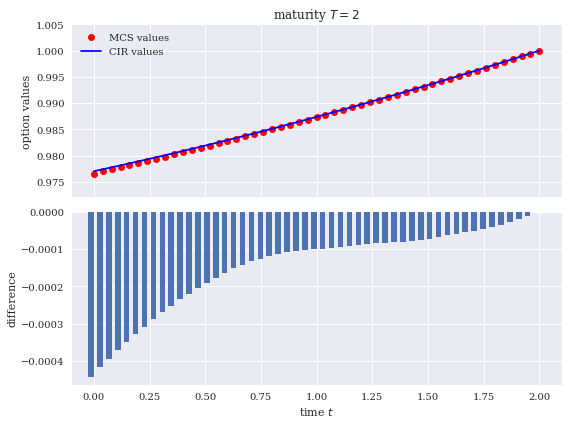

In [95]:
graphical_comparison(50, 'Euler')
plt.savefig('../images/10_mcs/CIR_zcb_mcs_euler.pdf')

In [96]:
zcb_estimator(200, 'Euler')[0]

0.9770507721588338

In [97]:
B([0.01, 0.1, 0.03, 0.2, 0., T])

0.9770141427176138

In [98]:
%timeit r = CIR_generate_paths(r0, kappa_r, theta_r, sigma_r, T, M, I, 'exact')

341 ms ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
%timeit r = CIR_generate_paths(r0, kappa_r, theta_r, sigma_r, T, M, I, 'Euler')

95.7 ms ± 3.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [100]:
M = 4 * M
%timeit r = CIR_generate_paths(r0, kappa_r, theta_r, sigma_r, T, M, I, 'Euler')

402 ms ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Chapter 10: Monte Carlo Simulation

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### European Options

In [102]:
#%run 10_mcs/H93_european_mcs.py

In [103]:
import pandas as pd

In [104]:
h5 = pd.HDFStore('10_mcs/mcs_european.h5', 'r')
results = h5['results']
h5.close()

In [105]:
results['index_disc'] = results['index_disc'].apply(lambda x: x[0]) 
results['var_disc'] = results['var_disc'].apply(lambda x: x[0]) 

In [106]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161280 entries, 0 to 161279
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   MCS_est          161280 non-null  float64       
 1   PY1_acc          161280 non-null  bool          
 2   PY2_acc          161280 non-null  bool          
 3   PY_acc           161280 non-null  bool          
 4   SE               161280 non-null  float64       
 5   anti_paths       161280 non-null  bool          
 6   error            161280 non-null  float64       
 7   index_disc       161280 non-null  object        
 8   maturity         161280 non-null  float64       
 9   moment_matching  161280 non-null  bool          
 10  otype            161280 non-null  object        
 11  panel            161280 non-null  int64         
 12  paths            161280 non-null  int64         
 13  rel_error        161280 non-null  float64       
 14  runs             161

In [107]:
cols = ['otype', 'runs', 'paths', 'index_disc', 'var_disc', 
        'moment_matching', 'anti_paths']

In [108]:
var_disc_select = ['F', 'P', 'T', 'A']
grouped = results[(results.steps == 50)
                & (results.paths == 100000)
                & (results.index_disc == 'L')
                & (results.var_disc.isin(var_disc_select))].groupby(cols)

In [109]:
mse = lambda x: np.sum(x ** 2) / len(x)
err = lambda x: sum(-x)

In [110]:
tab = grouped.agg({'value': len, 'PY_acc': err, 'error': (np.mean, mse)})

In [111]:
tmpl = r'%4s & %3d & %6d &  %s  &  %s  & %5s & %5s & %3d & %3d & %7.5f & %7.5f \tn' 

In [112]:
table = ''
f = open('10_mcs/table_10_1.tex', 'w')
for i in range(len(tab)):
    dats = list(tab.iloc[i].name)
    dats.extend(tab[['PY_acc', 'value', 'error']].iloc[i].values)
    row = tmpl % tuple(dats) + '\n'
    table += row
    f.write(row)
f.close()

In [113]:
print(table) # table 10.1

CALL &   5 & 100000 &  L  &  A  & False & False & 146 & 180 & 0.07670 & 3.74152 \tn
CALL &   5 & 100000 &  L  &  A  & False &  True & 146 & 180 & 0.07288 & 3.75574 \tn
CALL &   5 & 100000 &  L  &  A  &  True & False &   3 & 180 & 0.00633 & 0.00136 \tn
CALL &   5 & 100000 &  L  &  A  &  True &  True &   3 & 180 & 0.00468 & 0.00149 \tn
CALL &   5 & 100000 &  L  &  F  & False & False & 146 & 180 & 0.03556 & 3.63164 \tn
CALL &   5 & 100000 &  L  &  F  & False &  True & 148 & 180 & 0.03462 & 3.62426 \tn
CALL &   5 & 100000 &  L  &  F  &  True & False &   1 & 180 & -0.01659 & 0.00113 \tn
CALL &   5 & 100000 &  L  &  F  &  True &  True &   1 & 180 & -0.01299 & 0.00090 \tn
CALL &   5 & 100000 &  L  &  P  & False & False & 144 & 180 & 0.03942 & 3.68678 \tn
CALL &   5 & 100000 &  L  &  P  & False &  True & 145 & 180 & 0.04079 & 3.64441 \tn
CALL &   5 & 100000 &  L  &  P  &  True & False &   1 & 180 & -0.01474 & 0.00108 \tn
CALL &   5 & 100000 &  L  &  P  &  True &  True &   1 & 180 & -0.01128 & 

In [114]:
grouped = results[(results.steps == 50)
                & (results.paths == 100000)
                & (results.moment_matching == True)
                & (results.anti_paths == True)].groupby(cols)

In [115]:
tab = grouped.agg({'value': len, 'PY_acc': err, 'error': (np.mean, mse)})

In [116]:
table = ''
f = open('10_mcs/table_10_2.tex', 'w')
for i in range(len(tab)):
    dats = list(tab.iloc[i].name)
    dats.extend(tab[['PY_acc', 'value', 'error']].iloc[i].values)
    row = tmpl % tuple(dats) + '\n'
    table += row
    f.write(row)
f.close()

In [117]:
print(table)  # table 10.2

CALL &   5 & 100000 &  L  &  A  &  True &  True &   3 & 180 & 0.00468 & 0.00149 \tn
CALL &   5 & 100000 &  L  &  F  &  True &  True &   1 & 180 & -0.01299 & 0.00090 \tn
CALL &   5 & 100000 &  L  &  H  &  True &  True &   4 & 180 & 0.01169 & 0.00175 \tn
CALL &   5 & 100000 &  L  &  P  &  True &  True &   1 & 180 & -0.01128 & 0.00111 \tn
CALL &   5 & 100000 &  L  &  R  &  True &  True &   5 & 180 & 0.01208 & 0.00253 \tn
CALL &   5 & 100000 &  L  &  S  &  True &  True &  13 & 180 & 0.02979 & 0.00659 \tn
CALL &   5 & 100000 &  L  &  T  &  True &  True &   3 & 180 & 0.01147 & 0.00162 \tn
CALL &   5 & 100000 &  N  &  A  &  True &  True &   1 & 180 & 0.00805 & 0.00101 \tn
CALL &   5 & 100000 &  N  &  F  &  True &  True &   2 & 180 & -0.01566 & 0.00104 \tn
CALL &   5 & 100000 &  N  &  H  &  True &  True &   4 & 180 & 0.00545 & 0.00226 \tn
CALL &   5 & 100000 &  N  &  P  &  True &  True &   4 & 180 & -0.01526 & 0.00120 \tn
CALL &   5 & 100000 &  N  &  R  &  True &  True &   6 & 180 & 0.01221 & 

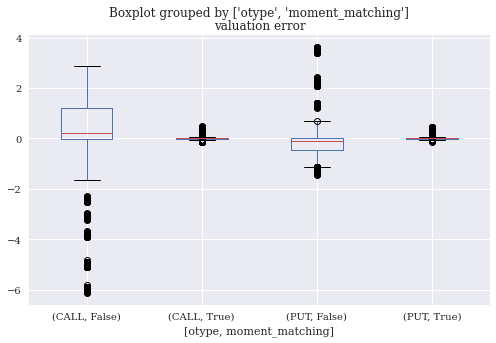

In [118]:
results[results.paths == 100000].boxplot('error',
            by=['otype', 'moment_matching'], figsize=(8, 5))
plt.title('valuation error')
plt.savefig('../images/10_mcs/box_mm.pdf')

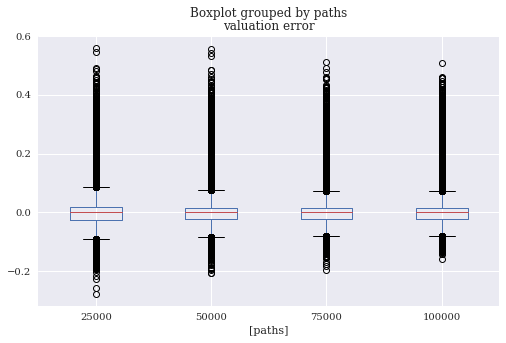

In [119]:
results[results.moment_matching == True].boxplot(
            'error', by=['paths'], figsize=(8, 5))
plt.title('valuation error')
plt.savefig('../images/10_mcs/box_paths.pdf')

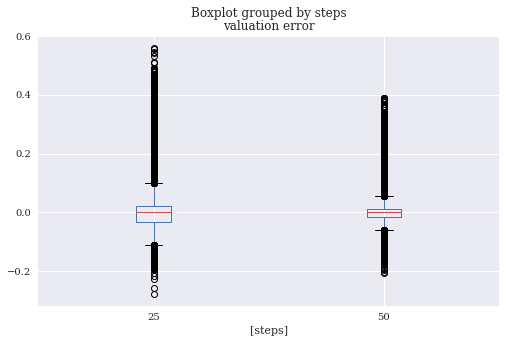

In [120]:
results[results.moment_matching == True].boxplot(
        'error', by=['steps'], figsize=(8, 5))
plt.title('valuation error')
plt.savefig('../images/10_mcs/box_steps.pdf')

### American Options

In [138]:
%run 10_mcs/SVSI_american_speed.py
# just to measure the valuation time per single valuation



 ((0.025, 0.015), 'Full Truncation', 25, 35000, True, True, True) 

Total time in seconds        41.75
Time per option valuation     0.12


In [139]:
sum(results['PY_acc'])

160

In [142]:
np.mean(results['error'])

-0.2225073895736762

In [143]:
np.mean(results['rel_error'])

-0.026394095366594397

In [132]:
%run 10_mcs/SVSI_american_mcs_10_3.py
# takes about 15 mins



 ((0.025, 0.015), 'Full Truncation', 20, 25000, True, True, True) 



 ((0.025, 0.015), 'Full Truncation', 20, 35000, True, True, True) 



 ((0.025, 0.015), 'Full Truncation', 25, 25000, True, True, True) 



 ((0.025, 0.015), 'Full Truncation', 25, 35000, True, True, True) 



 ((0.025, 0.015), 'Partial Truncation', 20, 25000, True, True, True) 



 ((0.025, 0.015), 'Partial Truncation', 20, 35000, True, True, True) 



 ((0.025, 0.015), 'Partial Truncation', 25, 25000, True, True, True) 



 ((0.025, 0.015), 'Partial Truncation', 25, 35000, True, True, True) 



 ((0.025, 0.015), 'Truncation', 20, 25000, True, True, True) 



 ((0.025, 0.015), 'Truncation', 20, 35000, True, True, True) 



 ((0.025, 0.015), 'Truncation', 25, 25000, True, True, True) 



 ((0.025, 0.015), 'Truncation', 25, 35000, True, True, True) 



 ((0.025, 0.015), 'Absorption', 20, 25000, True, True, True) 



 ((0.025, 0.015), 'Absorption', 20, 35000, True, True, True) 



 ((0.025, 0.015), 'Absorption', 25, 

In [144]:
h5 = pd.HDFStore('10_mcs/mcs_american_10_3_lam_1.h5', 'r')
results = h5['results']
h5.close()

TypeError: Unexpected keyword arguments {'freq'}

In [145]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        360 non-null    datetime64[ns]
 1   runs             360 non-null    int64         
 2   PY1              360 non-null    float64       
 3   PY2              360 non-null    float64       
 4   var_disc         360 non-null    object        
 5   steps            360 non-null    int64         
 6   paths            360 non-null    int64         
 7   control_variate  360 non-null    bool          
 8   anti_paths       360 non-null    bool          
 9   moment_matching  360 non-null    bool          
 10  panel            360 non-null    int64         
 11  maturity         360 non-null    float64       
 12  strike           360 non-null    float64       
 13  benchmark        360 non-null    float64       
 14  V0_euro          360 non-null    float64  

In [ ]:
results.iloc[0]

In [ ]:
results['var_disc'] = results['var_disc'].apply(lambda x: x[0]) 

In [ ]:
cols = ['steps', 'paths', 'var_disc', 'control_variate', 
        'moment_matching', 'anti_paths']

In [ ]:
grouped = results[(results.control_variate == True)
                  & (results.moment_matching == True)
                  & (results.anti_paths == True)].groupby(cols)

In [ ]:
tab = grouped.agg({'benchmark': len, 'PY_acc': err, 'error': (np.mean, mse)})

In [ ]:
tmpl = r'%d & %3d & %6d &  %s  & %5s & %5s & %5s & %3d & %3d & %7.5f & %7.5f \tn' 

In [ ]:
table = ''
f = open('10_mcs/table_10_3.tex', 'w')
for i in range(len(tab)):
    dats = list(tab.iloc[i].name)
    dats.extend(tab[['PY_acc', 'benchmark', 'error']].iloc[i].values)
    dats.insert(0, 5)
    row = tmpl % tuple(dats) + '\n'
    table += row
    f.write(row)
f.close()

In [ ]:
print(table)  # table 10.3

In [ ]:
# %run 10_mcs/SVSI_american_mcs_10_4.py
# takes about 20 mins

In [ ]:
h5 = pd.HDFStore('10_mcs/mcs_american_10_4_lam_1.h5', 'r')
results = h5['results']
h5.close()

In [ ]:
results['var_disc'] = results['var_disc'].apply(lambda x: x[0]) 

In [ ]:
results.iloc[0]

In [ ]:
var_disc_select = ['F', 'P', 'T', 'A']
grouped = results[(results.paths == 35000)
                  & (results.var_disc.isin(var_disc_select))].groupby(cols)

In [ ]:
tab = grouped.agg({'benchmark': len, 'PY_acc': err, 'error': (np.mean, mse)})

In [ ]:
table = ''
f = open('10_mcs/table_10_4.tex', 'w')
for i in range(len(tab)):
    dats = list(tab.iloc[i].name)
    dats.extend(tab[['PY_acc', 'benchmark', 'error']].iloc[i].values)
    dats.insert(0, 5)
    row = tmpl % tuple(dats) + '\n'
    table += row
    f.write(row)
f.close()

In [ ]:
print(table) # table 10.4

In [ ]:
# %run 10_mcs/SVSI_american_mcs_10_5.py
# takes about 60 mins

In [ ]:
h5 = pd.HDFStore('10_mcs/mcs_american_10_5_lam_1.h5', 'r')
results = h5['results']
h5.close()

In [ ]:
results['var_disc'] = results['var_disc'].apply(lambda x: x[0]) 

In [ ]:
results.iloc[0]

In [ ]:
var_disc_select = ['F', 'P', 'T', 'A']
grouped = results[(results.var_disc.isin(var_disc_select))].groupby(cols)

In [ ]:
tab = grouped.agg({'benchmark': len, 'PY_acc': err, 'error': (np.mean, mse)})

In [ ]:
table = ''
f = open('10_mcs/table_10_5.tex', 'w')
for i in range(len(tab)):
    dats = list(tab.iloc[i].name)
    dats.extend(tab[['PY_acc', 'benchmark', 'error']].iloc[i].values)
    dats.insert(0, 5)
    row = tmpl % tuple(dats) + '\n'
    table += row
    f.write(row)
f.close()

In [ ]:
print(table) # table 10.5